$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 3$

---

Joanna Wójcicka, gr2

---

# 3. Transformes

Transformers are a neural network architecture proposed in the paper “Attention Is All You Need” (Vaswani et al., 2017). They revolutionized natural language processing (NLP) and later found applications in other fields as well—computer vision, audio, biology, and time series analysis.

The operating principle of a Transformer is based on the attention mechanism, which allows the model to dynamically focus on the most relevant parts of the input data, instead of processing it sequentially like RNNs or LSTMs.


## 3.1 Transofrmers in NLP



### 3.1.1 General concept




#### **Preprocessing**
 * Tokenization
 * Converting sentences into sequences of integer numbers (words ids
 * Padding

$$
\textbf{I love this movie!}
\xrightarrow{\text{Preprocessing}}
[\texttt{[CLS]},\ id_{I}, id_{love}, id_{this}, id_{movie}, \texttt{[SEP]}]
$$


In [1]:
from tensorflow.keras import layers

pos_phrases = [
    "i love this movie", "what a great day", "amazing product highly recommend",
    "fantastic results very happy", "pleasant surprise exceeded expectations",
    "brilliant idea well executed", "superb quality", "wonderful experience",
    "happy with the outcome", "this is excellent"
]
neg_phrases = [
    "i hate this movie", "what a terrible day", "awful product do not buy",
    "disappointing results very unhappy", "bad idea poorly executed",
    "horrible quality", "worst experience", "sad with the outcome",
    "this is terrible", "completely unacceptable"
]

texts = pos_phrases + neg_phrases

max_len = 8
vectorizer = layers.TextVectorization(max_tokens=1000, output_sequence_length=max_len)
vectorizer.adapt(texts)

vocab_size = len(vectorizer.get_vocabulary())
print("Vocabulary size:", vocab_size)

print(vectorizer.get_vocabulary())

2025-11-08 17:18:39.388634: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-08 17:18:40.367590: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-08 17:18:41.624919: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Vocabulary size: 50
['', '[UNK]', np.str_('this'), np.str_('with'), np.str_('what'), np.str_('very'), np.str_('the'), np.str_('terrible'), np.str_('results'), np.str_('quality'), np.str_('product'), np.str_('outcome'), np.str_('movie'), np.str_('is'), np.str_('idea'), np.str_('i'), np.str_('happy'), np.str_('experience'), np.str_('executed'), np.str_('day'), np.str_('a'), np.str_('worst'), np.str_('wonderful'), np.str_('well'), np.str_('unhappy'), np.str_('unacceptable'), np.str_('surprise'), np.str_('superb'), np.str_('sad'), np.str_('recommend'), np.str_('poorly'), np.str_('pleasant'), np.str_('not'), np.str_('love'), np.str_('horrible'), np.str_('highly'), np.str_('hate'), np.str_('great'), np.str_('fantastic'), np.str_('expectations'), np.str_('excellent'), np.str_('exceeded'), np.str_('do'), np.str_('disappointing'), np.str_('completely'), np.str_('buy'), np.str_('brilliant'), np.str_('bad'), np.str_('awful'), np.str_('amazing')]


I0000 00:00:1762618722.399720     892 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9517 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [2]:
X = vectorizer(texts)
X.shape

TensorShape([20, 8])

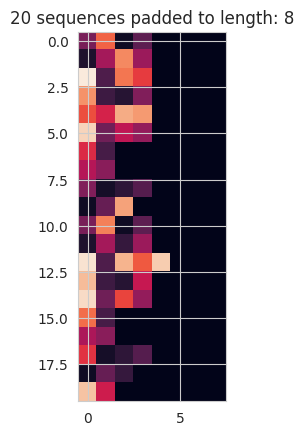

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X)
plt.title(f'{X.shape[0]} sequences padded to length: {X.shape[1]}')
plt.show()

vocabulary size: 50
{'<PAD>': 0, '<UNK>': 1, 'i': 2, 'love': 3, 'this': 4, 'movie': 5, 'what': 6, 'a': 7, 'great': 8, 'day': 9, 'amazing': 10, 'product': 11, 'highly': 12, 'recommend': 13, 'fantastic': 14, 'results': 15, 'very': 16, 'happy': 17, 'pleasant': 18, 'surprise': 19, 'exceeded': 20, 'expectations': 21, 'brilliant': 22, 'idea': 23, 'well': 24, 'executed': 25, 'superb': 26, 'quality': 27, 'wonderful': 28, 'experience': 29, 'with': 30, 'the': 31, 'outcome': 32, 'is': 33, 'excellent': 34, 'hate': 35, 'terrible': 36, 'awful': 37, 'do': 38, 'not': 39, 'buy': 40, 'disappointing': 41, 'unhappy': 42, 'bad': 43, 'poorly': 44, 'horrible': 45, 'worst': 46, 'sad': 47, 'completely': 48, 'unacceptable': 49}


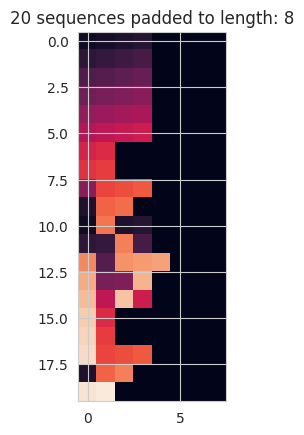

In [4]:
# for PyTorch

import torch

def build_vocab(texts):
    vocab = {"<PAD>": 0, "<UNK>": 1}
    for t in texts:
        for w in t.lower().split():
            if w not in vocab:
                vocab[w] = len(vocab)
    return vocab

def encode(text, vocab, max_len=8):
    tokens = [vocab.get(w, 1) for w in text.lower().split()]
    tokens = tokens[:max_len]
    return tokens + [0]*(max_len - len(tokens))

vocab = build_vocab(texts)

print(f"vocabulary size: {len(vocab)}")
print(vocab)

max_len = 8
X = torch.tensor([encode(t, vocab, max_len) for t in texts])

plt.imshow(X.detach().numpy())
plt.title(f'{X.shape[0]} sequences padded to length: {X.shape[1]}')
plt.show()


####  **Embedding and positional encoding**

Each token is represented as embedding vector (of selected length). Vectors are arranged into matrices.

$$
[\texttt{[CLS]},\ t_1, t_2, \ldots, t_n, \texttt{[SEP]}] \xrightarrow{\text{Embedding Layer}}
X = [\mathbf{x}_{\text{CLS}}, \mathbf{x}_1, \ldots, \mathbf{x}_n, \mathbf{x}_{\text{SEP}}]
$$

$$
\xrightarrow{+\ \text{Positional Encoding}}
Z = X + PE
$$

While embeddings store reprezentation of token values, positional encoding gives information on their position within the sentence (document).

$$
\begin{aligned}
PE_{\text{pos},\, 2i} &= \sin\!\left(\frac{\text{pos}}{10000^{\,2i/d_{\text{model}}}}\right) \\
PE_{\text{pos},\, 2i+1} &= \cos\!\left(\frac{\text{pos}}{10000^{\,2i/d_{\text{model}}}}\right)
\end{aligned}
$$

where $d_{\text{model}}$ is the embedding size, pos - a position within the sequence.

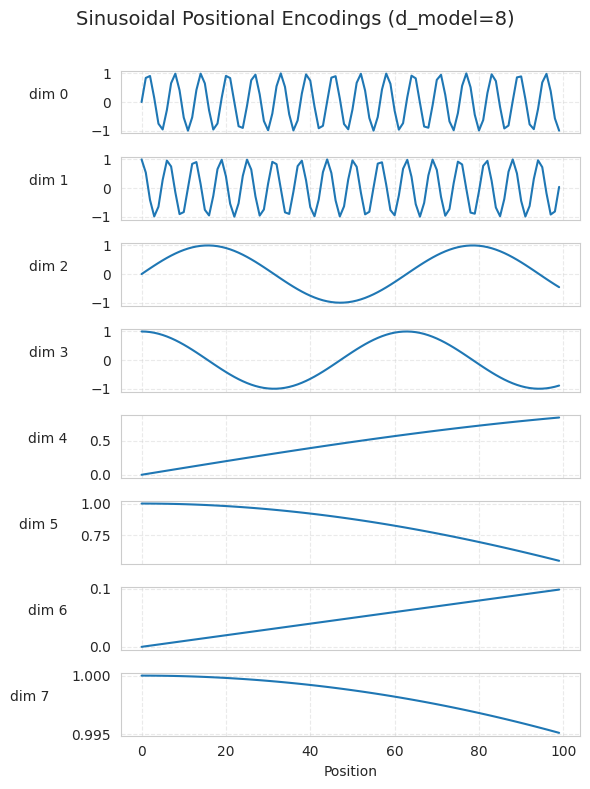

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len, d_model):
    positions = np.arange(seq_len)[:, np.newaxis]          # shape (seq_len, 1)
    dimensions = np.arange(d_model)[np.newaxis, :]         # shape (1, d_model)
    angle_rates = 1 / np.power(10000, (2 * (dimensions // 2)) / np.float32(d_model))
    angle_rads = positions * angle_rates

    # Apply sin to even indices, cos to odd indices
    pos_encoding = np.zeros_like(angle_rads)
    pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])

    return pos_encoding

# Example parameters
seq_len = 100
d_model = 8

pos_encoding = positional_encoding(seq_len, d_model)

# Plot
fig, axes = plt.subplots(d_model, 1, figsize=(6, d_model), sharex=True)

for i, ax in enumerate(axes):
    ax.plot(pos_encoding[:, i])
    ax.set_ylabel(f"dim {i}", rotation=0, labelpad=30, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.4)

axes[-1].set_xlabel("Position")
fig.suptitle(f"Sinusoidal Positional Encodings (d_model={d_model})", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Distances between positional encodings of neighboring positions

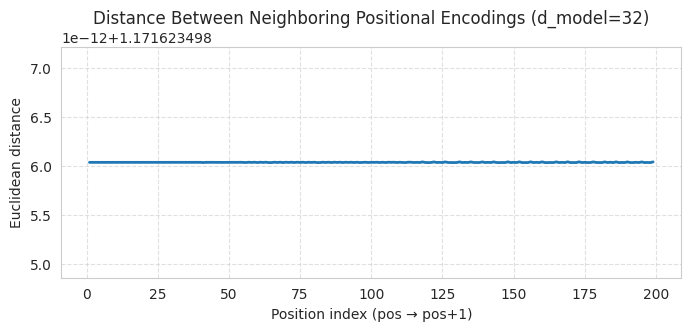

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len, d_model):
    positions = np.arange(seq_len)[:, np.newaxis]  # (seq_len, 1)
    i = np.arange(d_model)[np.newaxis, :]          # (1, d_model)
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = positions * angle_rates

    pos_encoding = np.zeros_like(angle_rads)
    pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return pos_encoding

# Parameters
seq_len = 200
d_model = 32

# Compute positional encodings
pos_encoding = positional_encoding(seq_len, d_model)

# Compute Euclidean distances between neighboring encodings
diffs = np.diff(pos_encoding, axis=0)
distances = np.linalg.norm(diffs, axis=1)

# Plot
plt.figure(figsize=(8, 3))
plt.plot(np.arange(1, seq_len), distances, lw=2)
plt.title(f"Distance Between Neighboring Positional Encodings (d_model={d_model})")
plt.xlabel("Position index (pos → pos+1)")
plt.ylabel("Euclidean distance")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



* Neighboring positions are not identical, but they’re close — roughly 1.1-1.3 units apart in a high-dimensional space.

* This gives the model a smooth positional gradient, while still keeping positions distinct.

#### **Transformer block**
In the next step $Z = X + PE$ (a matrix, which columns are sums of embeddings and positional encoding) is supplied to the transformer block.
$$
Z \xrightarrow{\text{Transformer Encoder Stack (}\times N\text{)}}
$$

$$
\begin{cases}
Q = ZW_Q, \quad K = ZW_K, \quad V = ZW_V \\[6pt]
\text{Attention}(Q,K,V) =
\text{softmax}\!\left(\dfrac{QK^\top}{\sqrt{d_k}}\right)V \\[6pt]
\text{Add & LayerNorm} \\[4pt]
\text{FeedForward: } \text{ReLU}(xW_1 + b_1)W_2 + b_2 \\[4pt]
\text{Add & LayerNorm}
\end{cases}
$$



The most importan element is the *Attention* layer.
For each position in a sequence (e.g., each word in a sentence), a Transformer computes three vectors:
* $Q=ZW_Q$ - query:  *What am I trying to attend to?*
* $K=ZW_K$ - key: *What does this element represent?*
* $V=ZW_V$ - value: *What information do I carry?*

The attention score between two elements is computed as the dot product of the Query and the Key:

$$score(i,j) = Q_i \cdot K_j$$

This score determines how much element $i$ should pay attention to element $j$
After applying softmax, these scores are used to compute a weighted sum of the Values $V$, producing the output of the attention mechanism.

Multi-head attention is an extension of the standard attention mechanism in Transformers. Instead of computing a single attention map, the model uses multiple “heads,” each with its own set of Query, Key, and Value projections. Each head can focus on different aspects of the sequence simultaneously — for example, one head might capture syntactic relationships while another captures semantic dependencies.

#### **Attention map example**

Attention weights shape: torch.Size([1, 1, 4, 4])


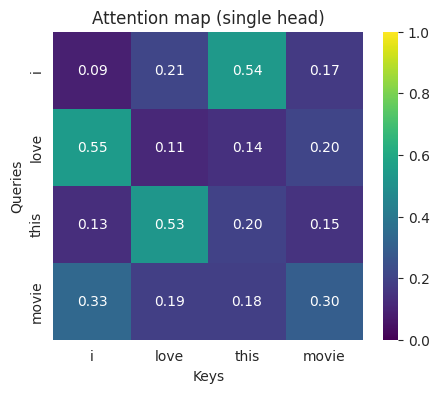

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# === Input data ===
vocab = {"<PAD>":0, "<UNK>":1, "i":2, "love":3, "this":4, "movie":5}
max_len = 4

def encode(text):
    tokens = [vocab.get(w, 1) for w in text.lower().split()]
    tokens = tokens[:max_len]
    return tokens + [0]*(max_len - len(tokens))

sentence = "i love this movie"
words = sentence.split()

x = torch.tensor([encode(sentence)], dtype=torch.long)  # shape: (1, seq_len)

# === Embeddings (random) ===
embed_dim = 8
seq_len = x.shape[1]
vocab_size = 10
embed_dim = 128
num_heads = 1

embedding = nn.Embedding(vocab_size, embed_dim)
x = torch.arange(seq_len) % vocab_size  # [0,1,2,3]
x = embedding(x).unsqueeze(1)  # (seq_len, batch, embed_dim)

# === Multi-head attention ===
multihead_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=False)

# Self-attention: query, key, value = x
attn_output, attn_weights = multihead_attn(x, x, x, need_weights=True, average_attn_weights=False)

print("Attention weights shape:", attn_weights.shape)
# -> (num_heads, batch, seq_len, seq_len)

# === Visualization of attention map ===
attn_maps = attn_weights.squeeze(1).detach().numpy().reshape(num_heads,4,4)  # (num_heads, seq_len, seq_len)


if num_heads==1:
  fig, ax = plt.subplots(figsize=(5, 4))
  sns.heatmap(attn_maps[0], vmin=0, vmax=1, cmap="viridis",
              xticklabels=words, yticklabels=words,annot=True, fmt=".2f", ax=ax)
  ax.set_title("Attention map (single head)")
  ax.set_xlabel("Keys")
  ax.set_ylabel("Queries")
else:
  fig, axes = plt.subplots(1, num_heads, figsize=(4*num_heads+1, 4))
  for i, ax in enumerate(axes):
      sns.heatmap(attn_maps[i], vmin=0, vmax=1, cmap="viridis",
                  xticklabels=words, yticklabels=words,annot=True, fmt=".2f", ax=ax)
      ax.set_title(f"Head {i+1}")
      ax.set_xlabel("Keys")
      ax.set_ylabel("Queries")

  plt.tight_layout()
plt.show()


#### **Classification**

Transformer block returns a sequence of hidden states:
$$
H_{\text{enc}} = [\mathbf{h}_{\text{CLS}}, \mathbf{h}_1, \ldots, \mathbf{h}_n, \mathbf{h}_{\text{SEP}}]
$$

Depending on the architecture:
* Only the first vector $\mathbf{h}_{\text{CLS}}$ is furher used in classification.
* Or classification is based on all or averaged values of $\mathbf{h}_1, \ldots, \mathbf{h}_n$


**The next steps (classification)**:
$$
\xrightarrow{}
H_{\text{enc}} = [\mathbf{h}_{\text{CLS}}, \mathbf{h}_1, \ldots, \mathbf{h}_n, \mathbf{h}_{\text{SEP}}]
$$

$$
\xrightarrow{\text{Take } \mathbf{h}_{\text{CLS}}}
\mathbf{h}_{\text{out}} = \mathbf{h}_{\text{CLS}} \in \mathbb{R}^{d_{\text{model}}}
$$

$$\text{or}$$

$$
\xrightarrow{\text{Take } \mathbf{h}_1, \ldots, \mathbf{h}_n}
\mathbf{h}_{\text{out}} = \text{Mean}(\mathbf{h}_1, \ldots, \mathbf{h}_n)
$$

$$
\xrightarrow{\text{Classification Head (Dense Layer)}}
\text{logits} = \mathbf{h}_{\text{out}} W_c + b_c
$$

$$
\xrightarrow{\text{Softmax}}
P(y \mid X) = \text{softmax}(\text{logits})
$$

$$
\xrightarrow{\text{Loss (categorical crossentropy)}}
\mathcal{L} = - \sum_{c=1}^{C} \mathbf{1}(y = c) \, \log P(y_c \mid X)
$$



### 3.1.2 Tiny example

#### Tensorflow

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# --- Dane ---
pos_phrases = [
    "i love this movie", "what a great day", "amazing product highly recommend",
    "fantastic results very happy", "pleasant surprise exceeded expectations",
    "brilliant idea well executed", "superb quality", "wonderful experience",
    "happy with the outcome", "this is excellent"
]
neg_phrases = [
    "i hate this movie", "what a terrible day", "awful product do not buy",
    "disappointing results very unhappy", "bad idea poorly executed",
    "horrible quality", "worst experience", "sad with the outcome",
    "this is terrible", "completely unacceptable"
]

texts = pos_phrases + neg_phrases
labels = [1]*len(pos_phrases) + [0]*len(neg_phrases)

# --- Tokenizacja ---
max_len = 8
vectorizer = layers.TextVectorization(max_tokens=1000, output_sequence_length=max_len)
vectorizer.adapt(texts)

vocab_size = len(vectorizer.get_vocabulary())
print("Vocabulary size:", vocab_size)


# --- Funkcja positional encoding ---
def positional_encoding(max_len, d_model):
    positions = np.arange(max_len)[:, np.newaxis]
    dims = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (dims // 2)) / np.float32(d_model))
    angle_rads = positions * angle_rates

    pos_encoding = np.zeros_like(angle_rads)
    pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return tf.cast(pos_encoding[np.newaxis, ...], dtype=tf.float32)


# --- Blok Transformer (1 warstwa) ---
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim)
        ])
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.norm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.norm2(out1 + ffn_output)


# --- Model ---
embed_dim = 32
num_heads = 2
ff_dim = 64

inputs = keras.Input(shape=(max_len,), dtype=tf.int64)
x = layers.Embedding(vocab_size, embed_dim)(inputs)

# Dodanie positional encoding
pos_encoding = positional_encoding(max_len, embed_dim)
x = x + pos_encoding

# Blok Transformer
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = layers.GlobalAveragePooling1D()(x) # no class token
x = layers.Dropout(0.1)(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, x)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# --- Trening ---
X = vectorizer(texts)
y = tf.constant(labels, dtype=tf.float32)

history = model.fit(X, y, epochs=35, batch_size=4, verbose=0)

# --- Test ---
test_phrases = [
    "i really love this product",
    "this is horrible",
    "fantastic quality and great idea",
    "disappointing and bad",
    "wonderful surprise",
    "completely bad experience"
]

test_X = vectorizer(test_phrases)
preds = model.predict(test_X)

for phrase, p in zip(test_phrases, preds):
    print(f"{phrase:45s} → sentiment: {'positive' if p[0]>0.5 else 'negative'} ({p[0]:.2f})")


Vocabulary size: 50


2025-11-08 17:20:25.073662: I external/local_xla/xla/service/service.cc:163] XLA service 0x7352e001aeb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-08 17:20:25.073683: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2025-11-08 17:20:25.121308: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-08 17:20:25.381218: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
I0000 00:00:1762618828.148578    1021 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-11-08 17:20:29.456961: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe t

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
i really love this product                    → sentiment: positive (0.82)
this is horrible                              → sentiment: negative (0.41)
fantastic quality and great idea              → sentiment: positive (0.95)
disappointing and bad                         → sentiment: negative (0.06)
wonderful surprise                            → sentiment: positive (0.96)
completely bad experience                     → sentiment: negative (0.06)


#### PyTorch

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F

# --- Dane ---
pos_phrases = [
    "i love this movie", "what a great day", "amazing product highly recommend",
    "fantastic results very happy", "pleasant surprise exceeded expectations",
    "brilliant idea well executed", "superb quality", "wonderful experience",
    "happy with the outcome", "this is excellent"
]
neg_phrases = [
    "i hate this movie", "what a terrible day", "awful product do not buy",
    "disappointing results very unhappy", "bad idea poorly executed",
    "horrible quality", "worst experience", "sad with the outcome",
    "this is terrible", "completely unacceptable"
]

texts = pos_phrases + neg_phrases
labels = torch.tensor([1]*len(pos_phrases) + [0]*len(neg_phrases), dtype=torch.float32)

# --- Prosta tokenizacja ---
from collections import defaultdict

def build_vocab(texts):
    vocab = {"<PAD>": 0, "<UNK>": 1}
    for t in texts:
        for w in t.lower().split():
            if w not in vocab:
                vocab[w] = len(vocab)
    return vocab

def encode(text, vocab, max_len=8):
    tokens = [vocab.get(w, 1) for w in text.lower().split()]
    tokens = tokens[:max_len]
    return tokens + [0]*(max_len - len(tokens))

vocab = build_vocab(texts)
max_len = 8
X = torch.tensor([encode(t, vocab, max_len) for t in texts])

vocab_size = len(vocab)
embed_dim = 32
num_heads = 2
ff_dim = 64

# --- Positional Encoding ---
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1), :]

# --- Transformer model ---
class MiniTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, ff_dim, max_len):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_encoding = PositionalEncoding(embed_dim, max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_dim, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=1)
        self.fc1 = nn.Linear(embed_dim, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = self.pos_encoding(x)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling (no class token)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze(-1)

# --- Trening ---
model = MiniTransformer(vocab_size, embed_dim, num_heads, ff_dim, max_len)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss()

for epoch in range(50):
    optimizer.zero_grad()
    preds = model(X)
    loss = criterion(preds, labels)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        acc = ((preds > 0.5).float() == labels).float().mean()
        print(f"Epoch {epoch+1:02d} | Loss: {loss.item():.4f} | Acc: {acc.item():.2f}")

# --- Test ---
test_phrases = [
    "i really love this product",
    "this is horrible",
    "fantastic quality and great idea",
    "disappointing and bad"
]

X_test = torch.tensor([encode(t, vocab, max_len) for t in test_phrases])
preds = model(X_test).detach()

for t, p in zip(test_phrases, preds):
    print(f"{t:45s} → sentiment: {'positive' if p>0.5 else 'negative'} ({p.item():.2f})")


Epoch 10 | Loss: 0.6751 | Acc: 0.85
Epoch 20 | Loss: 0.6385 | Acc: 0.90
Epoch 30 | Loss: 0.5460 | Acc: 0.90
Epoch 40 | Loss: 0.3466 | Acc: 0.95
Epoch 50 | Loss: 0.1387 | Acc: 1.00
i really love this product                    → sentiment: positive (0.79)
this is horrible                              → sentiment: negative (0.14)
fantastic quality and great idea              → sentiment: positive (0.89)
disappointing and bad                         → sentiment: negative (0.10)


### 3.1.3 IMDB Reviews

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Load dataset ---
max_words = 10000  # vocabulary size
max_len = 200      # max review length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step
Train shape: (25000, 200), Test shape: (25000, 200)


In [11]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Load raw IMDB text dataset ---
ds_train = tfds.load('imdb_reviews', split='train', as_supervised=True)
ds_test = tfds.load('imdb_reviews', split='test', as_supervised=True)

# Convert to Python lists
train_texts, train_labels = [], []
for text, label in tfds.as_numpy(ds_train):
    train_texts.append(text.decode("utf-8"))
    train_labels.append(label)

test_texts, test_labels = [], []
for text, label in tfds.as_numpy(ds_test):
    test_texts.append(text.decode("utf-8"))
    test_labels.append(label)

print(f"Loaded {len(train_texts)} training and {len(test_texts)} test samples.")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/wojcj/tensorflow_datasets/imdb_reviews/plain_text/incomplete.CFA8VT_1.0.0/imdb_reviews-train.t…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/wojcj/tensorflow_datasets/imdb_reviews/plain_text/incomplete.CFA8VT_1.0.0/imdb_reviews-test.tf…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/wojcj/tensorflow_datasets/imdb_reviews/plain_text/incomplete.CFA8VT_1.0.0/imdb_reviews-unsuper…

Dataset imdb_reviews downloaded and prepared to /home/wojcj/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


2025-11-08 17:26:14.082243: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-11-08 17:26:16.064584: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loaded 25000 training and 25000 test samples.


2025-11-08 17:26:18.041688: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 10000   # keep top 10k words
max_len = 200       # truncate/pad reviews to 200 tokens

# --- Fit tokenizer on training texts ---
tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
tokenizer.fit_on_texts(train_texts)

# --- Convert to sequences ---
X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

# --- Pad sequences ---
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

y_train = np.array(train_labels)
y_test = np.array(test_labels)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (25000, 200), Test shape: (25000, 200)


### TF model

In [13]:
from tensorflow.keras import layers, models

embed_dim = 12
num_heads = 1
ff_dim = 64 # feed forward dimension

inputs = layers.Input(shape=(max_len,))
x = layers.Embedding(max_words, embed_dim)(inputs)

# Add a simple Transformer encoder block
x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(ff_dim, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_tf = models.Model(inputs, outputs)
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_tf.summary()
hist = model_tf.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 200, 12)   │    120,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 200, 12)   │        624 │ embedding_1[0][0… │
│ (MultiHeadAttentio… │                   │            │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 12)        │          0 │ multi_head_atten… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │        832 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 121,521 (474.69 KB)

 Trainable params: 121,521 (474.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-11-08 17:27:11.275400: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15', 8 bytes spill stores, 8 bytes spill loads

2025-11-08 17:27:11.610250: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19', 8 bytes spill stores, 8 bytes spill loads

2025-11-08 17:27:11.711702: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1440', 328 bytes spill stores, 328 bytes spill loads



33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5306 - loss: 0.6927

2025-11-08 17:27:14.130828: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19', 8 bytes spill stores, 8 bytes spill loads

2025-11-08 17:27:14.221508: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15', 8 bytes spill stores, 8 bytes spill loads



40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5370 - loss: 0.6924

2025-11-08 17:27:15.714581: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 8 bytes spill stores, 8 bytes spill loads

2025-11-08 17:27:16.266443: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 8 bytes spill stores, 8 bytes spill loads



40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.5734 - loss: 0.6910 - val_accuracy: 0.6890 - val_loss: 0.6842
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6944 - loss: 0.6566 - val_accuracy: 0.7666 - val_loss: 0.5958
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7966 - loss: 0.4956 - val_accuracy: 0.8294 - val_loss: 0.4030
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8473 - loss: 0.3571 - val_accuracy: 0.8484 - val_loss: 0.3558
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8766 - loss: 0.3042 - val_accuracy: 0.8622 - val_loss: 0.3311
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8921 - loss: 0.2736 - val_accuracy: 0.8722 - val_loss: 0.3198
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9057 - loss: 0.2438 - val_accuracy: 0.8580 - val_loss: 0.3422
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9147 - loss: 0.2263 - val_accuracy: 0.8648 - val_loss: 0.3310
Ep

Text(0, 0.5, 'Accuracy')

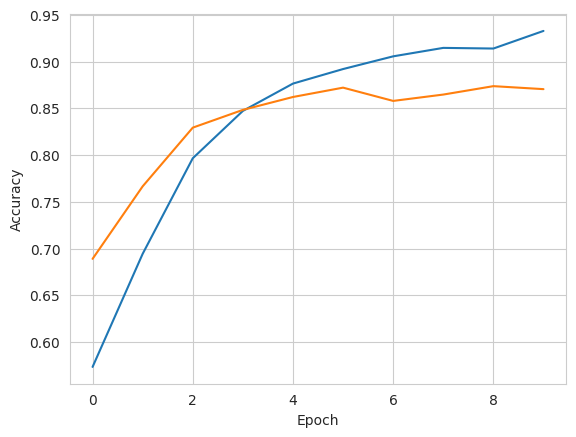

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

2025-11-08 17:28:59.883635: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 8 bytes spill stores, 8 bytes spill loads



782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

📈 Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.88      0.86     12500
    Positive       0.87      0.84      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000


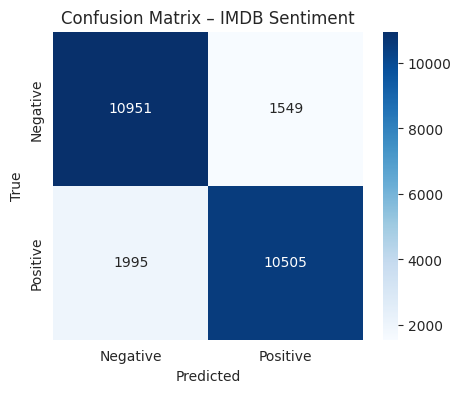

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Evaluate model on test data ---
y_pred_probs = model_tf.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# --- Classification report ---
print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# --- Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
labels = ["Negative", "Positive"]

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – IMDB Sentiment")
plt.show()


### Pytorch

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convert to tensors
device = "cuda" if torch.cuda.is_available() else "cpu"
X_train_t = torch.tensor(X_train, dtype=torch.long)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.long)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=512, shuffle=True)

class SentimentTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, num_heads=4, ff_dim=256, num_layers=1, max_len=256):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_encoding = self._build_positional_encoding(max_len, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads,
                                                   dim_feedforward=ff_dim, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, 1)

    def _build_positional_encoding(self, max_len, d_model):
        pos = torch.arange(0, max_len).unsqueeze(1)
        div = torch.exp(torch.arange(0, d_model, 2) * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(pos * div)
        pe[:, 1::2] = torch.cos(pos * div)
        return pe.unsqueeze(0)  # shape (1, max_len, d_model)

    def forward(self, x):
        seq_len = x.size(1)
        x = self.embedding(x) + self.pos_encoding[:, :seq_len, :].to(x.device)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        x = torch.sigmoid(self.fc(x))
        return x.squeeze(-1)

model_torch = SentimentTransformer(max_words).to(device)
optimizer = optim.Adam(model_torch.parameters(), lr=1e-3)
criterion = nn.BCELoss()

# --- Training loop ---
for epoch in range(10):
    model_torch.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model_torch(xb).squeeze()
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: loss={total_loss/len(train_loader):.4f}")


Epoch 1: loss=0.6697
Epoch 2: loss=0.5223
Epoch 3: loss=0.4289
Epoch 4: loss=0.3639
Epoch 5: loss=0.3160
Epoch 6: loss=0.2741
Epoch 7: loss=0.2424
Epoch 8: loss=0.2151
Epoch 9: loss=0.1864
Epoch 10: loss=0.1623


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

# --- Evaluate on the test set ---
model_torch.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for i in range(0, len(X_test_t), 512):
        xb = X_test_t[i:i+512].to(device)
        preds = model_torch(xb).squeeze().cpu()
        y_pred.extend((preds > 0.5).int().numpy())
        y_true.extend(y_test_t[i:i+512].numpy())

# # --- Classification report ---
# print("\n📈 Classification Report:")
# print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))

# # --- Confusion matrix ---
# cm = confusion_matrix(y_true, y_pred)
# labels = ["Negative", "Positive"]

# plt.figure(figsize=(5, 4))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#             xticklabels=labels, yticklabels=labels)
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix – PyTorch IMDB Sentiment")
plt.show()


              precision    recall  f1-score   support

    negative       0.82      0.85      0.84     12500
    positive       0.84      0.82      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000


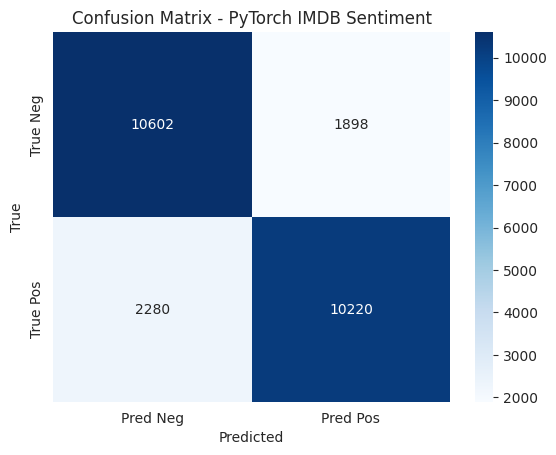

In [18]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_torch.eval()

# --- Create dataset & dataloader ---
test_ds = TensorDataset(X_test_t, y_test_t)
test_loader = DataLoader(test_ds, batch_size=512, shuffle=False)

# --- Evaluation ---
y_true, y_pred = [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model_torch(xb).squeeze()
        y_true.extend(yb.cpu().numpy())
        y_pred.extend((preds > 0.5).int().cpu().numpy())

# --- Metrics ---
print(classification_report(y_true, y_pred, target_names=["negative", "positive"]))

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Pred Neg", "Pred Pos"],
            yticklabels=["True Neg", "True Pos"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - PyTorch IMDB Sentiment")
plt.show()


In [33]:
def run_imdb_transformer(
    max_words=10000,
    max_len=200,
    embed_dim=32,
    num_heads=2,
    ff_dim=64,
    dropout=0.3,
    lr=1e-3,
    epochs=5,
    batch_size=512,
    val_split=0.2,
    plot_training=True,
    plot_cm=True,
):

    from tensorflow.keras import layers, models, optimizers, callbacks


    assert embed_dim % num_heads == 0, "embed_dim must be divisible by num_heads"
    key_dim = embed_dim // num_heads

    # --- Load raw IMDB ---
    ds_train = tfds.load('imdb_reviews', split='train', as_supervised=True)
    ds_test  = tfds.load('imdb_reviews',  split='test',  as_supervised=True)

    train_texts, train_labels = [], []
    for text, label in tfds.as_numpy(ds_train):
        train_texts.append(text.decode("utf-8"))
        train_labels.append(label)

    test_texts, test_labels = [], []
    for text, label in tfds.as_numpy(ds_test):
        test_texts.append(text.decode("utf-8"))
        test_labels.append(label)

    # --- Tokenize + pad ---
    tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
    tokenizer.fit_on_texts(train_texts)

    X_train = tokenizer.texts_to_sequences(train_texts)
    X_test  = tokenizer.texts_to_sequences(test_texts)

    X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
    X_test  = pad_sequences(X_test,  maxlen=max_len, padding='post', truncating='post')

    y_train = np.array(train_labels)
    y_test  = np.array(test_labels)

    # --- Build model (single Transformer block with proper residuals) ---
    inputs = layers.Input(shape=(max_len,), dtype="int32")
    x = layers.Embedding(max_words, embed_dim)(inputs)

    # simple learned positional embedding
    pos = tf.range(start=0, limit=max_len, delta=1)
    pos_emb = layers.Embedding(input_dim=max_len, output_dim=embed_dim)(pos)
    x = x + pos_emb

    attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
    x = layers.Add()([x, attn])
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    ff = layers.Dense(ff_dim, activation='relu')(x)
    ff = layers.Dropout(dropout)(ff)
    ff = layers.Dense(embed_dim)(ff)        # project back to embed_dim
    x = layers.Add()([x, ff])
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                  loss='binary_crossentropy', metrics=['accuracy'])

    # --- Train ---
    es = callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
    hist = model.fit(X_train, y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     validation_split=val_split,
                     callbacks=[es],
                     verbose=0)

    # --- Evaluate ---
    y_pred_probs = model.predict(X_test, verbose=0).ravel()
    y_pred = (y_pred_probs > 0.5).astype("int32")

    report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"], output_dict=False)
    print("\nClassification Report:\n", report)

    cm = confusion_matrix(y_test, y_pred)

    # --- Plots ---
    if plot_training:
        plt.figure()
        plt.plot(hist.history['accuracy'], label='train_acc')
        plt.plot(hist.history['val_accuracy'], label='val_acc')
        plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.tight_layout(); plt.show()

    if plot_cm:
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
        plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix – IMDB Sentiment")
        plt.tight_layout(); plt.show()

    return model, hist, report, cm, tokenizer


In [34]:
# 8 configurations for IMDB Transformer
configs = [
    # Small, fast baselines (short seq, small vocab)
    {"name":"A_small_fast",
     "max_words":10000, "max_len":128,
     "embed_dim":32, "num_heads":2, "ff_dim":64,
     "dropout":0.3, "lr":1e-3, "epochs":4, "batch_size":512},

    {"name":"B_small_heads3",
     "max_words":15000, "max_len":128,
     "embed_dim":48, "num_heads":3, "ff_dim":96,
     "dropout":0.3, "lr":1e-3, "epochs":4, "batch_size":512},

    # Medium sequence depth changes
    {"name":"C_med_longer_seq",
     "max_words":20000, "max_len":200,
     "embed_dim":64, "num_heads":4, "ff_dim":128,
     "dropout":0.3, "lr":7e-4, "epochs":5, "batch_size":512},

    {"name":"D_med_more_ff",
     "max_words":20000, "max_len":200,
     "embed_dim":64, "num_heads":4, "ff_dim":256,
     "dropout":0.3, "lr":7e-4, "epochs":5, "batch_size":512},

    # Larger vocab vs longer seq tradeoff
    {"name":"E_large_vocab",
     "max_words":40000, "max_len":200,
     "embed_dim":64, "num_heads":4, "ff_dim":128,
     "dropout":0.3, "lr":7e-4, "epochs":6, "batch_size":512},

    {"name":"F_long_seq",
     "max_words":20000, "max_len":256,
     "embed_dim":64, "num_heads":4, "ff_dim":192,
     "dropout":0.3, "lr":7e-4, "epochs":6, "batch_size":512},

    # Heavier model
    {"name":"G_heavy",
     "max_words":40000, "max_len":256,
     "embed_dim":96, "num_heads":6, "ff_dim":256,
     "dropout":0.3, "lr":6e-4, "epochs":6, "batch_size":512},

    # Regularization variant
    {"name":"H_dropout_high",
     "max_words":30000, "max_len":192,
     "embed_dim":64, "num_heads":4, "ff_dim":128,
     "dropout":0.5, "lr":1e-3, "epochs":5, "batch_size":512},
]



=== Running configuration: A_small_fast ===

Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.86      0.82     12500
    Positive       0.84      0.77      0.80     12500

    accuracy                           0.81     25000
   macro avg       0.82      0.81      0.81     25000
weighted avg       0.82      0.81      0.81     25000


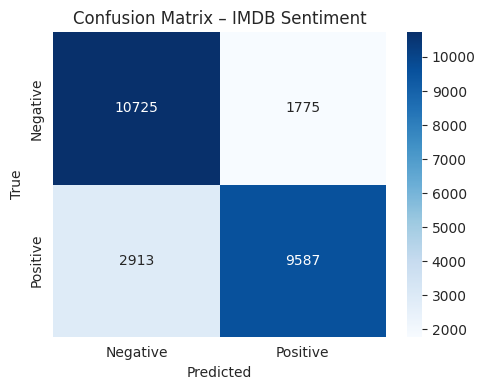


=== Running configuration: B_small_heads3 ===


2025-11-08 18:36:32.609656: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_fusion', 156 bytes spill stores, 148 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_fusion_1', 240 bytes spill stores, 236 bytes spill loads




Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.78      0.82     12500
    Positive       0.80      0.87      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000


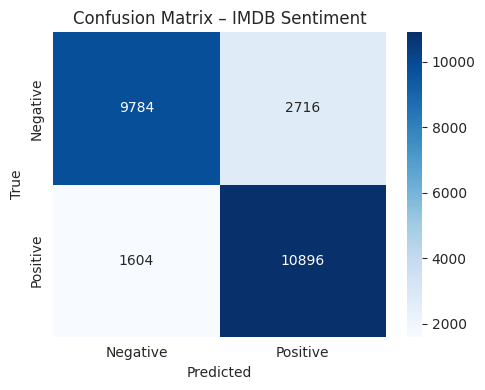


=== Running configuration: C_med_longer_seq ===

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.82      0.85     12500
    Positive       0.83      0.89      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000


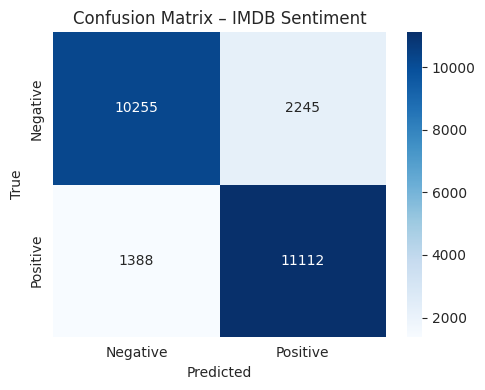


=== Running configuration: D_med_more_ff ===

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.85      0.86     12500
    Positive       0.85      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000


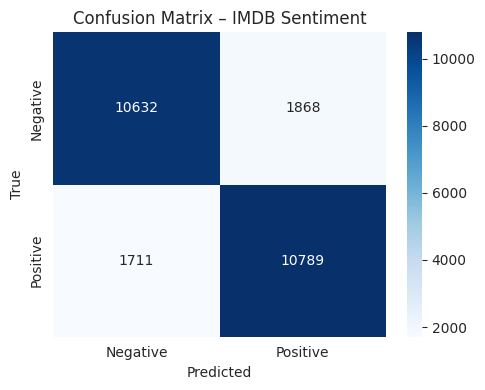


=== Running configuration: E_large_vocab ===

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.75      0.81     12500
    Positive       0.78      0.89      0.83     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000


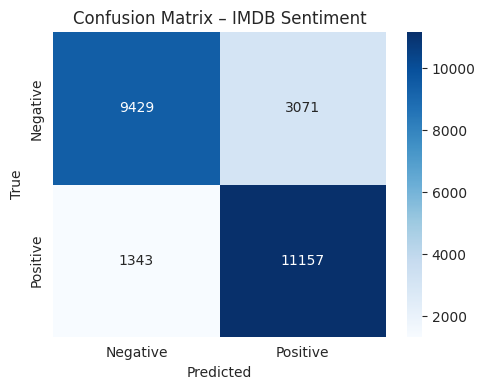


=== Running configuration: F_long_seq ===

Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.92      0.86     12500
    Positive       0.91      0.78      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000


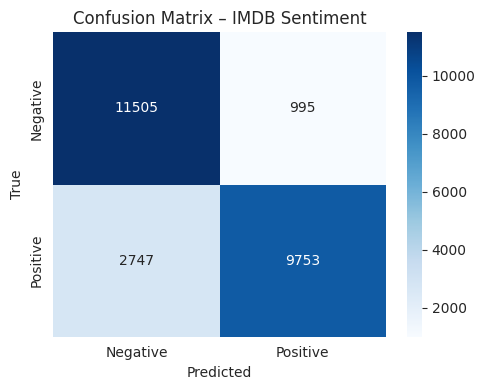


=== Running configuration: G_heavy ===

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.82      0.86     12500
    Positive       0.84      0.90      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000


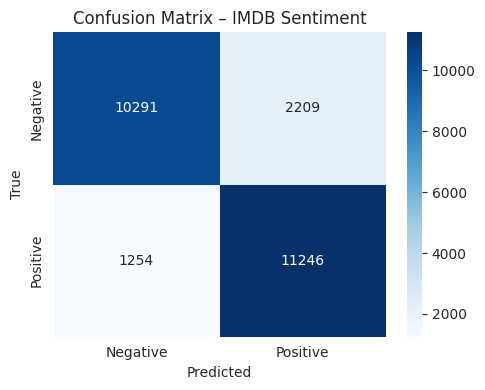


=== Running configuration: H_dropout_high ===


2025-11-08 18:39:19.398079: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.86      0.85     12500
    Positive       0.86      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000


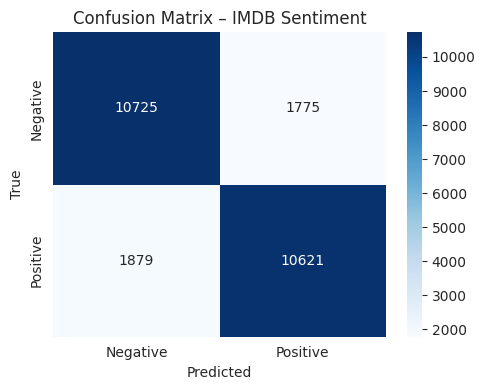


=== Results summary ===
               name  max_words  max_len  embed_dim  num_heads  ff_dim  \
0           G_heavy      40000      256         96          6     256   
1  C_med_longer_seq      20000      200         64          4     128   
2     D_med_more_ff      20000      200         64          4     256   
3    H_dropout_high      30000      192         64          4     128   
4        F_long_seq      20000      256         64          4     192   
5     E_large_vocab      40000      200         64          4     128   
6    B_small_heads3      15000      128         48          3      96   
7      A_small_fast      10000      128         32          2      64   

   dropout      lr  epochs  batch_size  val_accuracy  test_accuracy  \
0      0.3  0.0006       6         512        0.8884         0.8615   
1      0.3  0.0007       5         512        0.8684         0.8547   
2      0.3  0.0007       5         512        0.8690         0.8568   
3      0.5  0.0010       5       

In [35]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
rows = []
models = {}
histories = {}

for cfg in configs:
    print(f"\n=== Running configuration: {cfg['name']} ===")
    model, hist, report, cm, tokenizer = run_imdb_transformer(
        max_words=cfg["max_words"],
        max_len=cfg["max_len"],
        embed_dim=cfg["embed_dim"],
        num_heads=cfg["num_heads"],
        ff_dim=cfg["ff_dim"],
        dropout=cfg["dropout"],
        lr=cfg["lr"],
        epochs=cfg["epochs"],
        batch_size=cfg["batch_size"],
        val_split=0.2,
        plot_training=False,
        plot_cm=True,
    )

    # --- Evaluate on test set ---
    X_test_pad = pad_sequences(
        tokenizer.texts_to_sequences(test_texts),
        maxlen=cfg["max_len"], padding="post", truncating="post"
    )
    y_pred_probs = model.predict(X_test_pad, verbose=0).ravel()
    y_pred = (y_pred_probs > 0.5).astype("int32")

    acc = accuracy_score(test_labels, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        test_labels, y_pred, average="binary", zero_division=0
    )

    # --- Collect metrics ---
    final_val_acc = max(hist.history["val_accuracy"])
    rows.append({
        "name": cfg["name"],
        "max_words": cfg["max_words"],
        "max_len": cfg["max_len"],
        "embed_dim": cfg["embed_dim"],
        "num_heads": cfg["num_heads"],
        "ff_dim": cfg["ff_dim"],
        "dropout": cfg["dropout"],
        "lr": cfg["lr"],
        "epochs": cfg["epochs"],
        "batch_size": cfg["batch_size"],
        "val_accuracy": round(float(final_val_acc), 4),
        "test_accuracy": round(float(acc), 4),
        "precision": round(float(prec), 4),
        "recall": round(float(rec), 4),
        "f1": round(float(f1), 4),
    })

    models[cfg["name"]] = model
    histories[cfg["name"]] = hist

# --- Create final DataFrame ---
df = pd.DataFrame(rows).sort_values("f1", ascending=False).reset_index(drop=True)
print("\n=== Results summary ===")
print(df)

# --- Optional: LaTeX export ---
print("\n=== LaTeX Table ===")
print(df.to_latex(
    index=False,
    float_format="%.4f",
    caption="Transformer configurations and performance on IMDB sentiment classification",
    label="tab:transformer_results",
    escape=False
))

### TODO

Efficiency of determined classifier depend on several parameters, related to:
* Preprocessing: sequence length and vocabulary size
* Architecture: embedding dimension, number of heads, size of the hidden layer (feed forward dimensionon)
* Training process: number of epochs and learning rate

Prepare 8 configurations (including various preprocessing parameters). Report results in the table summarizing parameter values and classification results (report accuracy, precision, recall, F1).

Display a few reviews from the dataset and print classification result


# 3.2 Visual transformer (ViT)

Vision Transformers (ViTs) are models that apply the Transformer architecture directly to images by representing them as sequences of patch embeddings, allowing self-attention to capture relationships across the entire image without relying on convolutional operations.

**Patches**

Instead of tokens from text, ViT creates “visual tokens.”
An input image of shape $H\times W \times C$ is split into fixed size non-overlapping patches of size $P \times P \times C$. Hence, an image is represented by a sequence of visual tokens of length $N$, where $N = \frac{H \times W}{P^2}$.

Next, each patch $\mathbf{x}_i \in \mathbb{R}^{P \times P \times C}$  is flattened into a vector:

$$
\mathbf{x}_i \rightarrow \mathrm{vec}(\mathbf{x}_i) \in \mathbb{R}^{P^2 C}
$$

---
**Linear patch embedding**

Each flattened patch is linearly projected to a fixed-dimensional embedding space of dimension $D$:

$$
\mathbf{z}_i = \mathbf{W}_E \, \mathbf{x}_i + \mathbf{b}_E,
\quad \mathbf{W}_E \in \mathbb{R}^{D \times (P^2 C)}
$$

This produces a sequence of embedded tokens:

$$
\mathbf{Z} = [\mathbf{z}_1, \mathbf{z}_2, \ldots, \mathbf{z}_N]
$$

The matrix $\mathbf{W}_E$ is learnable.

---
**Class Token**

A learnable *classification token* $\mathbf{z}_\text{CLS} \in \mathbb{R}^{D} $ **can be** inserted at the beginning of the sequence:

$$
\mathbf{Z}' = [\mathbf{z}_\text{CLS}, \mathbf{z}_1, \ldots, \mathbf{z}_N]
$$

---
**Positional Embedding**

Transformer has no inherent notion of spatial order. Information on positions of patches in the image is encoded as embedding vectors.

Patch positions are indexed in images along rows or columns, and form a sequences of size $N$, e.g:

(0,0), (0,1), (0,2), ..., (1,0), (1,1), ...

Typically, learnable embeddings $ \mathbf{PE} \in \mathbb{R}^{(N+1) \times D} $ are used.


$$
\mathbf{Z}'' = \mathbf{Z}' + \mathbf{PE}
$$

---
**Transformer Encoder Block**

* Transformer Encoder Block
  * Self-Attention Block
  * MLP (Multilayer Perceptron

Transformerr Encoder Blocks can be repeated several times. It is believed that subsequent blocks catch higher level features.

The output is a sequence of hidden states $H_{\text{enc}} = [\mathbf{h}_{\text{CLS}}, \mathbf{h}_1, \ldots, \mathbf{h}_n, \mathbf{h}_{\text{SEP}}]$

---
**Dense and output layers**

If class token is used, its value $\mathbf{h}_{\text{CLS}}$ is extracted. In the opposite case mean value (sometimes all values) of $\mathbf{h}_1, \ldots, \mathbf{h}_n$ is used in the final block making classification.

## 3.2.1 Example of patches (CIFAR 10)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(f"Train: {x_train.shape}, Test: {x_test.shape}")
# (50000, 32, 32, 3) and (10000, 32, 32, 3)


Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


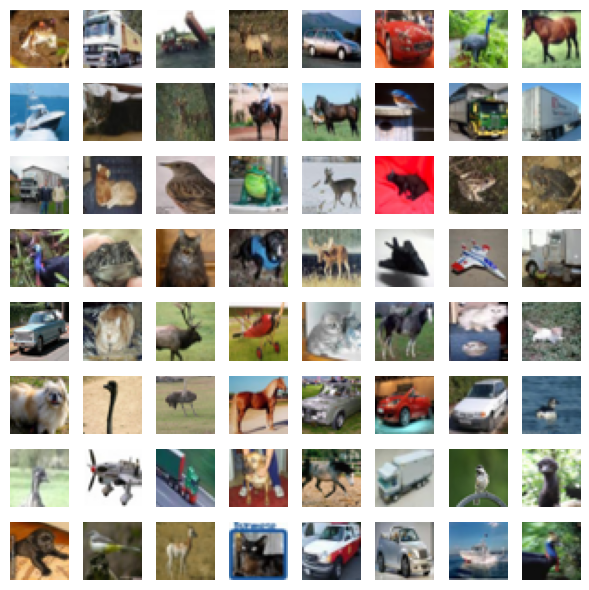

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(8, 8, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    patch = x_train[i]
    ax.imshow(patch)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dims = tf.shape(patches)[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

xp = Patches(patch_size=patch_size)(x_train[19].reshape(1, 32, 32, 3))

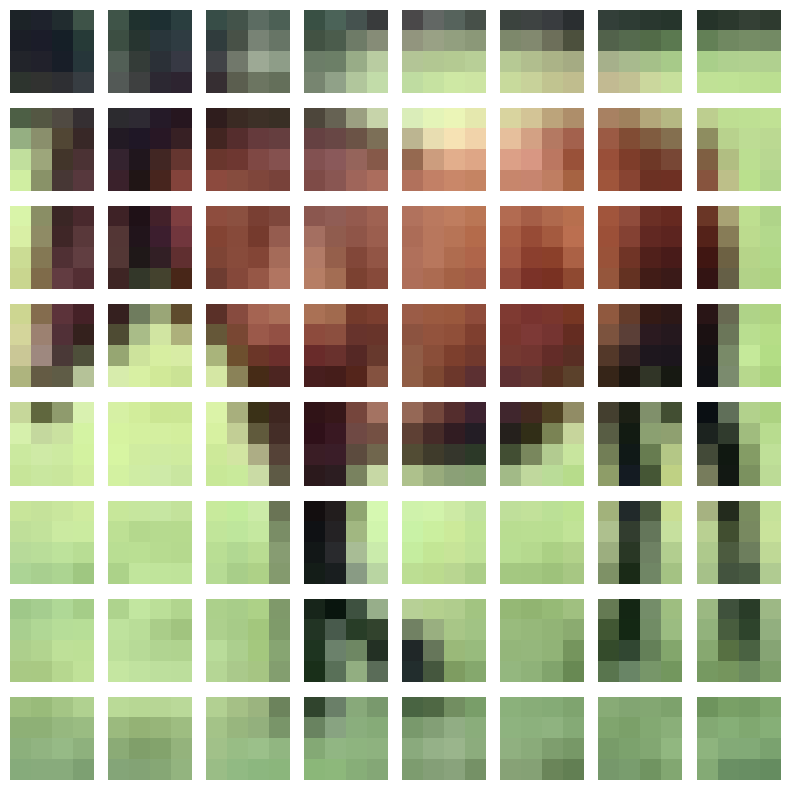

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

patch_size = 4

xp = Patches(patch_size=patch_size)(x_train[7].reshape(1, 32, 32, 3))

patches = xp[0].numpy().reshape(-1, patch_size, patch_size, 3)

fig, axes = plt.subplots(x_train.shape[1]//patch_size, x_train.shape[1]//patch_size, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    patch = patches[i]
    ax.imshow(patch)
    ax.axis("off")

plt.tight_layout()
plt.show()


## 3.2.1 Fashion MNIST example (Tensorflow)

In this example class token is not used. Instead, all values of hidden states are used for final classification.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- 1. Load Fashion-MNIST ---
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0

# --- 2. Define patch extraction and encoder layers ---
patch_size = 4
num_patches = (x_train.shape[1] // patch_size) ** 2
projection_dim = 64

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dims = tf.shape(patches)[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patches):
        x = self.projection(patches)
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        pos_emb = self.position_embedding(positions)
        pos_emb = tf.expand_dims(pos_emb, axis=0)
        return x + pos_emb

# --- 3. Build ViT model ---
def create_vit_classifier():
    inputs = layers.Input(shape=(28,28,1))
    patches = Patches(patch_size)(inputs)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Transformer blocks
    for _ in range(4):
        # LayerNorm + Multi-Head Self Attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=4, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])

        # MLP block
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(projection_dim * 2, activation=tf.nn.gelu)(x3)
        x3 = layers.Dense(projection_dim)(x3)
        encoded_patches = layers.Add()([x3, x2])

    # Classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    logits = layers.Dense(10)(representation)

    return keras.Model(inputs=inputs, outputs=logits)

model = create_vit_classifier()
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# --- 4. Train ---
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1)

# --- 5. Evaluate ---
model.evaluate(x_test, y_test)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.7035 - loss: 0.9442 - val_accuracy: 0.8617 - val_loss: 0.3823
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8493 - loss: 0.4282 - val_accuracy: 0.8782 - val_loss: 0.3300
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8681 - loss: 0.3708 - val_accuracy: 0.8763 - val_loss: 0.3284
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8780 - loss: 0.3312 - val_accuracy: 0.8880 - val_loss: 0.3063
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8783 - loss: 0.3273 - val_accuracy: 0.8802 - val_loss: 0.3229
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8865 - loss: 0.3063 - val_accuracy: 0.8925 - val_loss: 0.2831
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8973 - loss: 0.2851 - val_accuracy: 0.8970 - val_loss: 0.2804
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9000 - loss: 0.2702 - val_acc

[0.26253557205200195, 0.9077000021934509]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.87      0.83      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.74      0.76      0.75      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


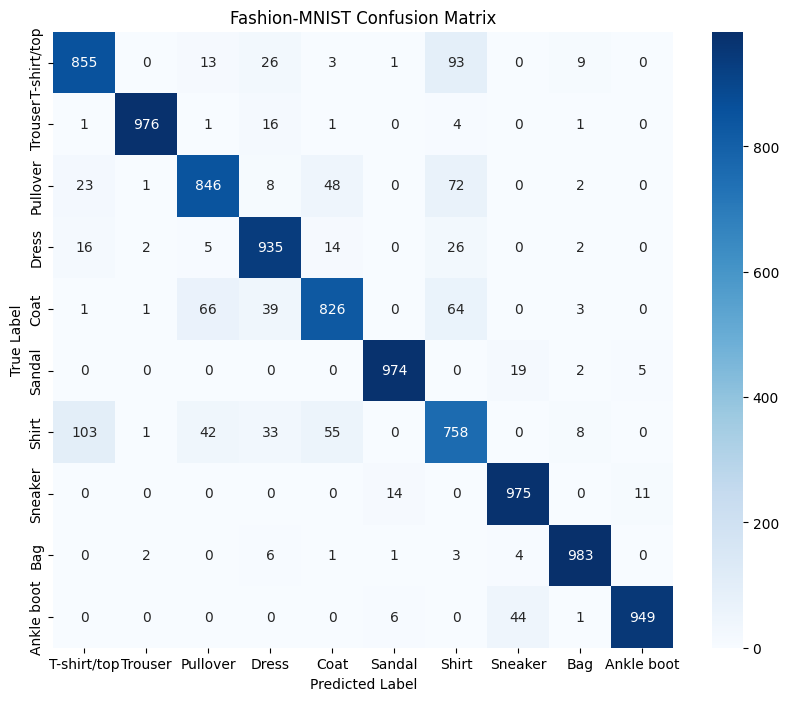

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Class names for Fashion-MNIST ---
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


# --- 2. Predict on test set ---
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# --- 3. Classification report ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# --- 4. Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Fashion-MNIST Confusion Matrix")
plt.show()


**GELU** is a smooth function similart to ReLU commonly used in Transformer models

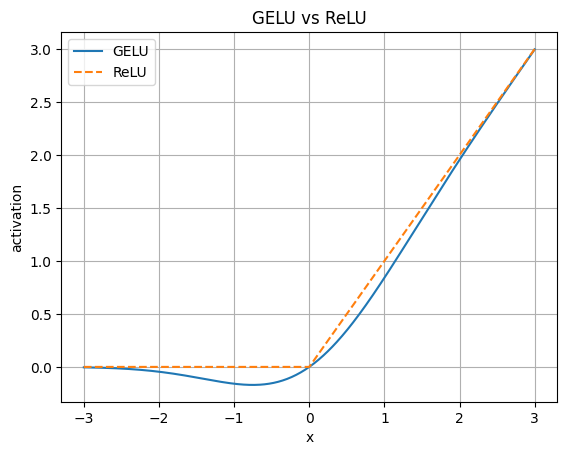

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Exact GELU
def gelu(x):
    return 0.5 * x * (1 + erf(x / np.sqrt(2)))

x = np.linspace(-3, 3, 500)
y = gelu(x)

plt.plot(x, y, label="GELU")
plt.plot(x, np.maximum(0, x), '--', label="ReLU")
plt.title("GELU vs ReLU")
plt.xlabel("x")
plt.ylabel("activation")
plt.grid(True)
plt.legend()
plt.show()


## 3.2.2 Fashion MNIST with class token (TF)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- 1. Load Fashion-MNIST ---
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0


# --- 2. Define patch extraction and encoder layers ---
patch_size = 4
num_patches = (x_train.shape[1] // patch_size) ** 2
projection_dim = 64

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dims = tf.shape(patches)[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches + 1,  # +1 na class token
            output_dim=projection_dim
        )
        # Inicjalizujemy class token jako trenowalny wektor
        self.class_token = self.add_weight(
            name="class_token",
            shape=(1, 1, projection_dim),
            initializer="random_normal",
            trainable=True,
        )

    def call(self, patches):
        batch_size = tf.shape(patches)[0]
        x = self.projection(patches)

        # Broadcast class token for each batch element
        class_token = tf.broadcast_to(self.class_token, [batch_size, 1, projection_dim])

        # Class token is inserted at the beginning
        x = tf.concat([class_token, x], axis=1)

        # Token positions (add 1 because of the class token )
        positions = tf.range(start=0, limit=self.num_patches + 1, delta=1)
        pos_emb = self.position_embedding(positions)
        pos_emb = tf.expand_dims(pos_emb, axis=0)
        return x + pos_emb


# --- 3. Build ViT model ---
def create_vit_classifier():
    inputs = layers.Input(shape=(28, 28, 1))
    patches = Patches(patch_size)(inputs)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Transformer blocks
    for _ in range(4):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=4, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(projection_dim * 2, activation=tf.nn.gelu)(x3)
        x3 = layers.Dense(projection_dim)(x3)
        encoded_patches = layers.Add()([x3, x2])

    # Classification head (tylko class token)
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    # extract the first token = class token
    class_token_output = representation[:, 0, :]
    representation = layers.Dropout(0.5)(class_token_output)
    logits = layers.Dense(10)(representation)

    return keras.Model(inputs=inputs, outputs=logits)


# --- 4. Compile & train ---
model = create_vit_classifier()
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.summary()

# --- 5. Train ---
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1)

# --- 6. Evaluate ---
model.evaluate(x_test, y_test)


Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_32      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_21          │ (None, None, 16)  │          0 │ input_layer_32[0… │
│ (Patches)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder_8     │ (None, 50, 64)    │      4,352 │ patches_21[0][0]  │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ patch_encoder_8[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_93 (Add)        │ (None, 50, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_93[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_128 (Dense)   │ (None, 50, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_129 (Dense)   │ (None, 50, 64)    │      8,256 │ dense_128[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_94 (Add)        │ (None, 50, 64)    │          0 │ dense_129[0][0],  │
│                     │                   │            │ add_93[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_94[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_95 (Add)        │ (None, 50, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add_94[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_95[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_130 (Dense)   │ (None, 50, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_131 (Dense)   │ (None, 50, 64)    │      8,256 │ dense_130[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_96 (Add)        │ (None, 50, 64)    │          0 │ dense_131[0][0],  │
│                     │                   │            │ add_95[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_96[0][0]      │
│ (LayerNormalizatio… │                   │            │                 

 Total params: 337,930 (1.29 MB)

 Trainable params: 337,930 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.5194 - loss: 1.3921 - val_accuracy: 0.8068 - val_loss: 0.5240
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8017 - loss: 0.5545 - val_accuracy: 0.8365 - val_loss: 0.4296
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8270 - loss: 0.4778 - val_accuracy: 0.8495 - val_loss: 0.3991
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8413 - loss: 0.4450 - val_accuracy: 0.8510 - val_loss: 0.3966
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8471 - loss: 0.4214 - val_accuracy: 0.8528 - val_loss: 0.3956
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8520 - loss: 0.4060 - val_accuracy: 0.8638 - val_loss: 0.3773
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8605 - loss: 0.3828 - val_accuracy: 0.8592 - val_loss: 0.3677
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8656 - loss: 0.3730 - val_a

[0.33483555912971497, 0.8787000179290771]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.83      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.91      0.88      0.90      1000
        Coat       0.78      0.84      0.81      1000
      Sandal       0.95      0.97      0.96      1000
       Shirt       0.71      0.63      0.67      1000
     Sneaker       0.96      0.92      0.94      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


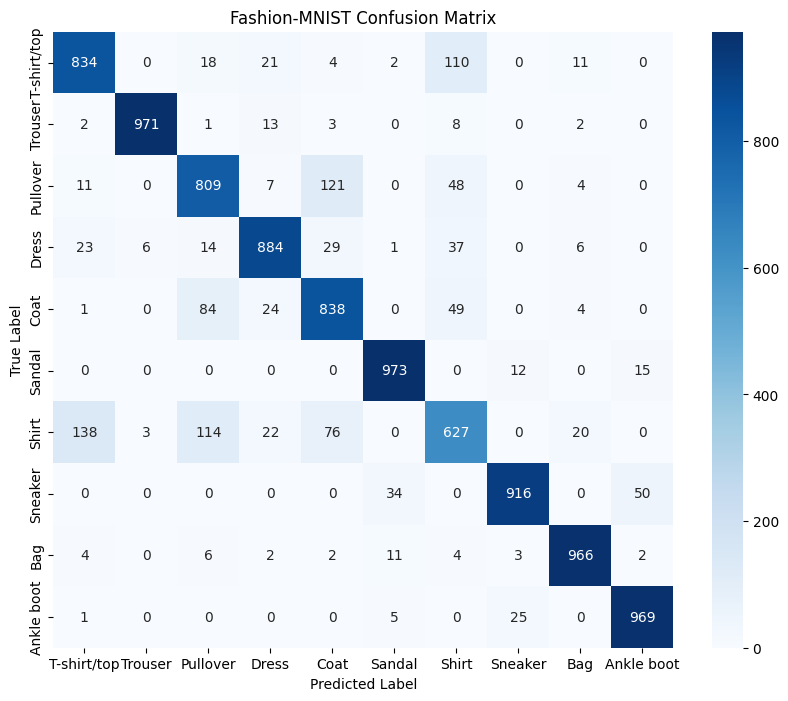

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Class names for Fashion-MNIST ---
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


# --- 2. Predict on test set ---
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# --- 3. Classification report ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# --- 4. Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Fashion-MNIST Confusion Matrix")
plt.show()


## 3.2.3 Fashion MNIST Pytorch (with class token)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# --- Data ---
transform = transforms.Compose([
    # transforms.Resize(32),
    transforms.ToTensor()
])
train_data = datasets.FashionMNIST(root='.', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='.', train=False, transform=transform)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)

# --- Model ---
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels=1, patch_size=4, emb_size=128, img_size=28):
        super().__init__()
        self.proj = nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1, emb_size))
        num_patches = (img_size // patch_size) ** 2
        self.pos_embed = nn.Parameter(torch.randn(1, num_patches + 1, emb_size))

    def forward(self, x):
        B = x.shape[0]
        x = self.proj(x).flatten(2).transpose(1, 2)  # (B, num_patches, emb_size)
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x = x + self.pos_embed
        return x

class ViT(nn.Module):
    def __init__(self, num_classes=10, emb_size=128, depth=4, n_heads=8, patch_size=4, img_size=28):
        super().__init__()
        self.patch_embed = PatchEmbedding(1, patch_size, emb_size, img_size)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=emb_size, nhead=n_heads, dim_feedforward=emb_size*2, dropout=0.1, activation='gelu', batch_first=True
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=depth)
        self.head = nn.Linear(emb_size, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        x = self.encoder(x)
        cls_output = x[:, 0]
        return self.head(cls_output)

# --- Training ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ViT().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

for epoch in range(20):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        loss = criterion(model(images), labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# --- Evaluation ---
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        preds = model(images).argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1, Loss: 0.8177
Epoch 2, Loss: 0.4889
Epoch 3, Loss: 0.4322
Epoch 4, Loss: 0.3957
Epoch 5, Loss: 0.3704
Epoch 6, Loss: 0.3511
Epoch 7, Loss: 0.3368
Epoch 8, Loss: 0.3241
Epoch 9, Loss: 0.3142
Epoch 10, Loss: 0.3030
Epoch 11, Loss: 0.2931
Epoch 12, Loss: 0.2854
Epoch 13, Loss: 0.2774
Epoch 14, Loss: 0.2702
Epoch 15, Loss: 0.2625
Epoch 16, Loss: 0.2592
Epoch 17, Loss: 0.2497
Epoch 18, Loss: 0.2461
Epoch 19, Loss: 0.2406
Epoch 20, Loss: 0.2336
Test Accuracy: 0.8880


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.76      0.82      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.81      0.82      0.82      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.83      0.78      0.80      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.65      0.76      0.70      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


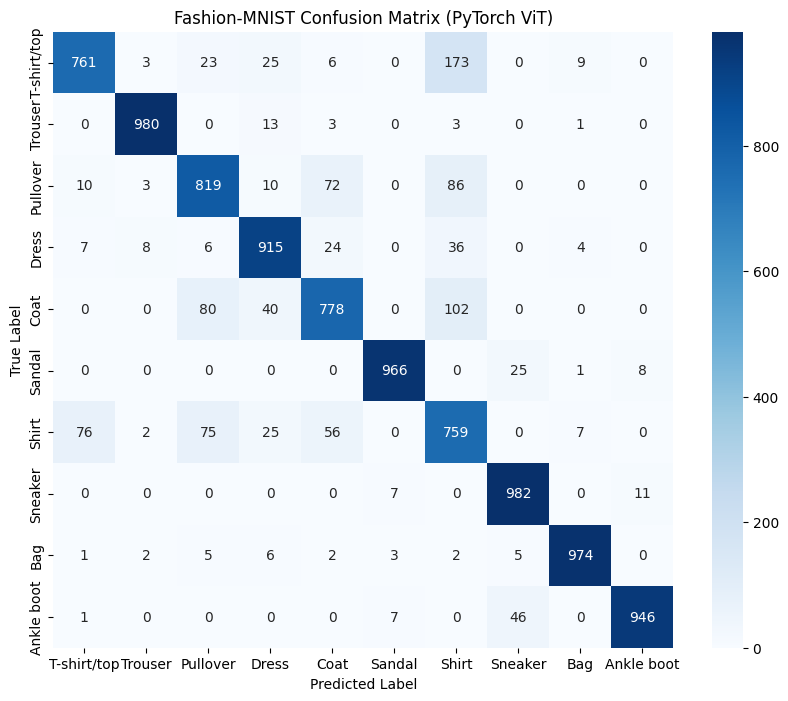

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# --- 1. Define class names ---
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# --- 2. Get predictions on test set ---
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

y_pred = torch.cat(all_preds).numpy()
y_true = torch.cat(all_labels).numpy()

# --- 3. Classification report ---
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# --- 4. Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Fashion-MNIST Confusion Matrix (PyTorch ViT)")
plt.show()


## 3.2.4 TODO

* Perform experiments on CIFAR-10 dataset. Observe, that image shapes are (32,32,3)
* Test at least 4 configurations using TF or Pytorch. What can be changed:
  * numbers of transformers blocks
  * embedding dimensions
  * using class tokens (or not)
  * patch size (2,4,8)
* Summarize results in a table.
* Include confusion matrix (use correct labels) and discuss which images were misclassified (e.g. aircrafts taken as frogs?)


# 3.3. Time series

In this section we will use Transformers for multivariate time series forecasting. The synthetic time series from Assignment 2 will be used

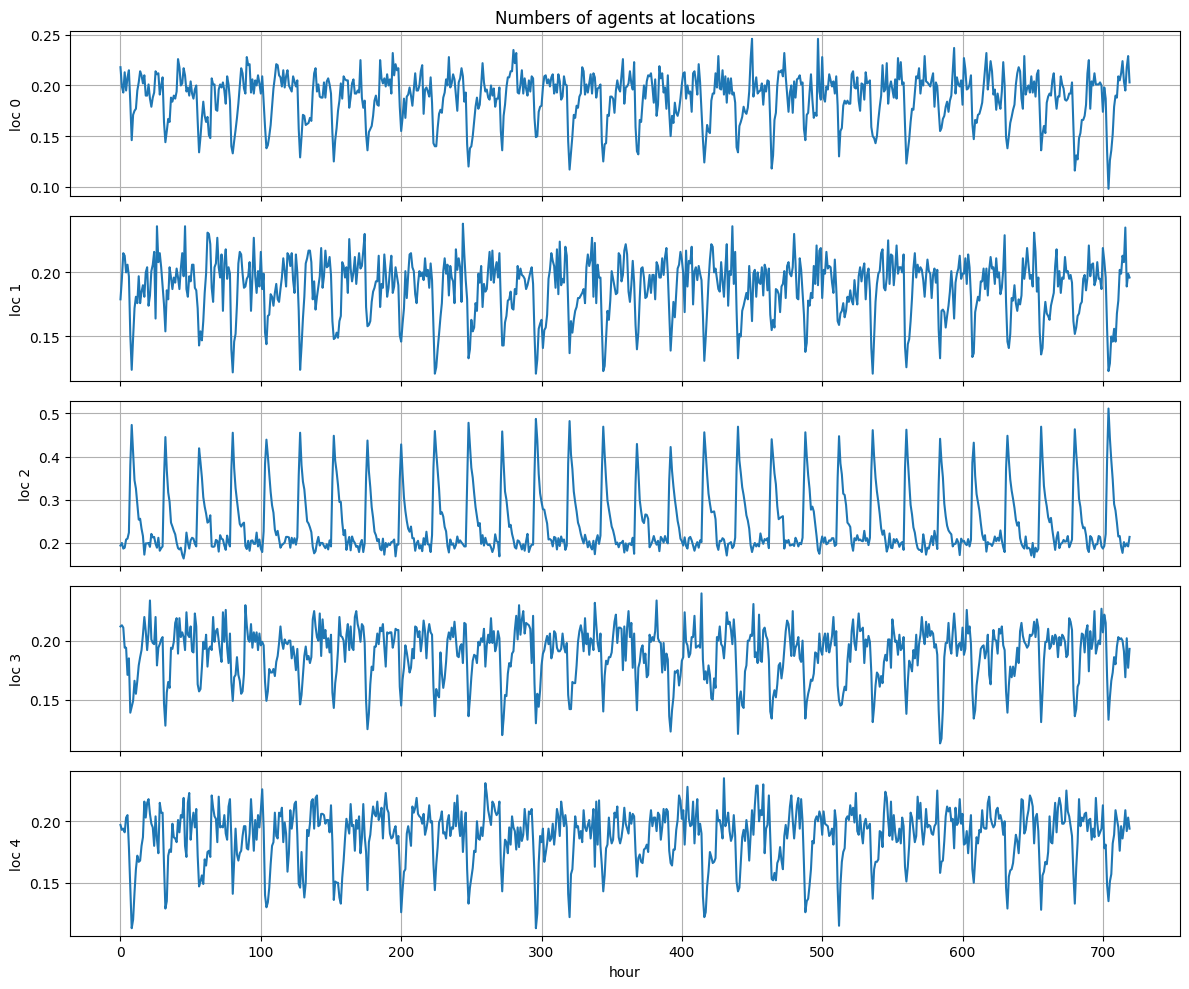

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# --- parameters ---
n_agents = 1000
n_locations = 5
center = 2
steps_per_day = 24
n_days = 30
T = steps_per_day * n_days

# --- parameters controlling  moves---
base_move_prob = 0.05
bias_to_center = 0.25
bias_to_home = 0.25
night_suppression = 0.2
random_variation = 0.05

# --- initiation of agnets ---
home = np.random.choice(n_locations, n_agents)
location = home.copy()
x = np.zeros((T, n_locations))

def hour_phase(hour):
    if 7 <= hour < 9:
        return 'morning'
    elif 9 <= hour < 17:
        return 'day'
    elif 17 <= hour < 19:
        return 'evening'
    else:
        return 'night'

# --- main sim loop ---
for t in range(T):
    hour = t % steps_per_day
    phase = hour_phase(hour)

    # basic transition matrix
    P = np.ones((n_locations, n_locations)) * base_move_prob
    np.fill_diagonal(P, 1 - base_move_prob * (n_locations - 1))

    if phase == 'morning':
        P[:, center] += bias_to_center
    elif phase == 'evening':
        for i in range(n_agents):
            P[location[i], home[i]] += bias_to_home
    elif phase == 'night':
        P = 1 - night_suppression + night_suppression * P

    # random perturbations
    P += random_variation * (np.random.rand(*P.shape) - 0.5)
    P = np.clip(P, 0, None)
    P /= P.sum(axis=1, keepdims=True)

    # updating agents locations
    new_locations = []
    for i in range(n_agents):
        loc = location[i]
        probs = P[loc]
        new_loc = np.random.choice(n_locations, p=probs)
        new_locations.append(new_loc)
    location = np.array(new_locations)

    # saving states (with normalization)
    for j in range(n_locations):
        x[t, j] = np.sum(location == j) / n_agents

# --- plots ---
fig, axes = plt.subplots(n_locations, 1, figsize=(12, 2*n_locations), sharex=True)

for j in range(n_locations):
    axes[j].plot(x[:, j], color='tab:blue')
    axes[j].set_ylabel(f"loc {j}")
    axes[j].grid(True)
    if j == 0:
        axes[j].set_title("Numbers of agents at locations")

axes[-1].set_xlabel("hour")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# assume, x has the shape (T, n_locations)
df = pd.DataFrame(x, columns=[f"loc_{j}" for j in range(n_locations)])
df.to_csv("population_timeseries.csv", index_label="t")
df.head()


,loc_0,loc_1,loc_2,loc_3,loc_4
0,0.218,0.179,0.194,0.212,0.197
1,0.199,0.195,0.200,0.213,0.193
2,0.193,0.215,0.187,0.211,0.194
3,0.213,0.213,0.189,0.194,0.191
4,0.195,0.200,0.208,0.194,0.203


As previous we will use 24 hours window (past values) to predict values one step ahead. A dataset containing observations $(x_i,y_i)$ where $x_i \in \mathbb{R}^{5 \times 24}$ and $y_i \in \mathbb{R}^{5}$ will be extracted from tthe time series.

In [ ]:
import numpy as np

# parameters
window_size = 24  # use last 24 hours to predict one hour ahead
n_features = n_locations

# tworzymy X i y
X = []
y = []

for t in range(T - window_size):
    X.append(df.iloc[t:t+window_size].values)
    y.append(df.iloc[t+window_size].values)

X = np.array(X)  # shape: (samples, window_size, n_features)
y = np.array(y)  # shape: (samples, n_features)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (696, 24, 5)
y shape: (696, 5)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

**Key point** the time series data must be scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Flatten time dimension for fitting (if your X is [samples, window, features])
X_train_2d = X_train.reshape(-1, X_train.shape[-1])
scaler_X.fit(X_train_2d)

# Scale y as well
scaler_y.fit(y_train)


StandardScaler()

In [ ]:
X_train_scaled = scaler_X.transform(X_train_2d).reshape(X_train.shape)
X_test_scaled  = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train_scaled = scaler_y.transform(y_train)
y_test_scaled  = scaler_y.transform(y_test)


## 3.3.1 TensorFlow implementation

**Key points**

* Use sin/cos positional encoding
* Dose not use class token. The last token in the sequence is used in prediction (or mean of token values - commented out `GlobalAveragPooling1D` or all token values)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import metrics


# === Hyperparameters ===
window_size = 24
num_features = 5
d_model = 64
num_heads = 4
ff_dim = 128
num_layers = 2

# === Positional Encoding ===

class PositionalEncoding(layers.Layer):
    def __init__(self, maxlen, d_model):
        super().__init__()
        self.maxlen = maxlen
        self.d_model = d_model
        # prepare positional encoding only once (float32)
        pos = tf.cast(tf.range(self.maxlen)[:, tf.newaxis], tf.float32)          # (maxlen, 1)
        i = tf.cast(tf.range(self.d_model)[tf.newaxis, :], tf.float32)          # (1, d_model)
        # frequencies: 1 / (10000^(2*(i//2)/d_model))
        angle_rates = 1.0 / tf.pow(10000.0, (2.0 * tf.floor(i / 2.0)) / tf.cast(self.d_model, tf.float32))
        angle_rads = pos * angle_rates  # (maxlen, d_model)

        # sin for even indexes, cos for odd
        sines = tf.sin(angle_rads[:, 0::2])    # (maxlen, d_model/2)
        cosines = tf.cos(angle_rads[:, 1::2])  # (maxlen, d_model/2)

        # arange as [sin0, cos0, sin1, cos1, ...]
        pos_encoding = tf.reshape(tf.stack([sines, cosines], axis=-1), (self.maxlen, self.d_model))
        pos_encoding = pos_encoding[tf.newaxis, ...]  # (1, maxlen, d_model)
        self.pos_encoding = tf.cast(pos_encoding, tf.float32)

    def call(self, x):
        # x: (batch, seq_len, d_model_in)
        seq_len = tf.shape(x)[1]
        # cast position dtype p dtype of input and add
        return x + tf.cast(self.pos_encoding[:, :seq_len, :], x.dtype)

# === Transformer Block ===
def transformer_block(inputs):
    attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(inputs, inputs)
    attn_output = layers.Dropout(0.1)(attn_output)
    out1 = layers.LayerNormalization(epsilon=1e-6)(inputs + attn_output)

    ffn = tf.keras.Sequential([
        layers.Dense(ff_dim, activation='relu'),
        layers.Dense(d_model),
    ])
    ffn_output = ffn(out1)
    ffn_output = layers.Dropout(0.1)(ffn_output)
    return layers.LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

# === Full Model ===
inputs = layers.Input(shape=(window_size, num_features))

# Project features to model dimension
x = layers.Dense(d_model)(inputs)
x = PositionalEncoding(window_size, d_model)(x)

# Apply N transformer layers
for _ in range(num_layers):
    x = transformer_block(x)

# Use the last token
last = layers.Lambda(lambda t: t[:, -1, :])(x)
outputs = layers.Dense(num_features)(last)

# Or pool across the time dimension
# x = layers.GlobalAveragePooling1D()(x)
# outputs = layers.Dense(num_features)(x)


# Or use the whole sequence
# x = layers.Flatten()(x)
# outputs = layers.Dense(num_features)(x)

model = models.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=[
                metrics.MeanAbsoluteError(name='mae'),
                metrics.RootMeanSquaredError(name='rmse'),
                metrics.R2Score(name='r2')])

model.summary()


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_33      │ (None, 24, 5)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_137 (Dense)   │ (None, 24, 64)    │        384 │ input_layer_33[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encodin… │ (None, 24, 64)    │          0 │ dense_137[0][0]   │
│ (PositionalEncodin… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 24, 64)    │     66,368 │ positional_encod… │
│ (MultiHeadAttentio… │                   │            │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_93          │ (None, 24, 64)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_101 (Add)       │ (None, 24, 64)    │          0 │ positional_encod… │
│                     │                   │            │ dropout_93[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_101[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_15       │ (None, 24, 64)    │     16,576 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_94          │ (None, 24, 64)    │          0 │ sequential_15[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_102 (Add)       │ (None, 24, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_94[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_102[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 24, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_96          │ (None, 24, 64)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_103 (Add)       │ (None, 24, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_96[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_103[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_16       │ (None, 24, 64)    │     16,576 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_97          │ (None, 24, 64)    │          0 │ sequential_16[0]… │
│ (Dropout)           │                   │            │                 

 Total params: 167,109 (652.77 KB)

 Trainable params: 167,109 (652.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=50,
    batch_size=32
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 367ms/step - loss: 1.1348 - mae: 0.8041 - r2: -0.1818 - rmse: 1.0555 - val_loss: 0.5294 - val_mae: 0.5436 - val_r2: 0.4820 - val_rmse: 0.7276
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5635 - mae: 0.5811 - r2: 0.4419 - rmse: 0.7505 - val_loss: 0.4477 - val_mae: 0.5066 - val_r2: 0.5640 - val_rmse: 0.6691
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4904 - mae: 0.5398 - r2: 0.5164 - rmse: 0.7002 - val_loss: 0.3549 - val_mae: 0.4530 - val_r2: 0.6543 - val_rmse: 0.5958
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4173 - mae: 0.4998 - r2: 0.5991 - rmse: 0.6459 - val_loss: 0.3224 - val_mae: 0.4392 - val_r2: 0.6850 - val_rmse: 0.5678
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3748 - mae: 0.4789 - r2: 0.6219 - rmse: 0.6120 - val_loss: 0.2902 - val_mae: 0.4161 - val_r2: 0.7190 - val_rmse: 0.5387
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3206 - mae: 0.4379 - r2: 0.6339 -

In [ ]:
loss, mae,rmse,r2 = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Test MAE: {mae} Test RMSE: {rmse} Test r2 {r2}" )


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2755 - mae: 0.3984 - r2: 0.7182 - rmse: 0.5248 
Test MAE: 0.39716124534606934 Test RMSE: 0.5249204039573669 Test r2 0.7289044857025146


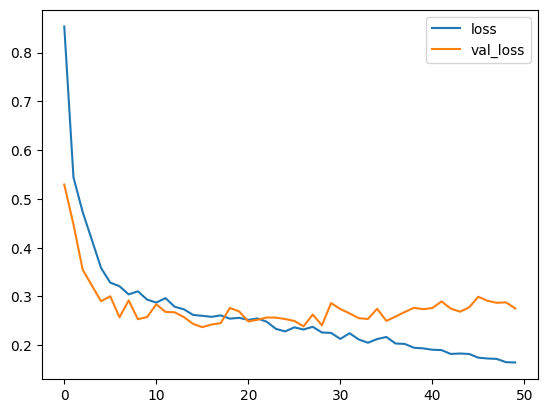

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
hist.history.keys()

dict_keys(['loss', 'mae', 'r2', 'rmse', 'val_loss', 'val_mae', 'val_r2', 'val_rmse'])

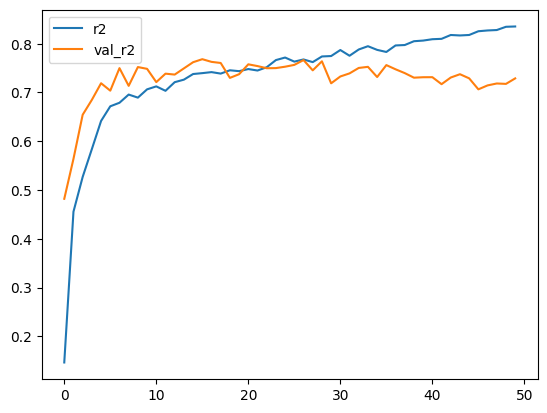

In [ ]:
plt.plot(hist.history['r2'], label='r2')
plt.plot(hist.history['val_r2'], label='val_r2')
plt.legend()
plt.show()

In [ ]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

from sklearn.metrics import r2_score, mean_squared_error
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step
R²: 0.7289045133070123
MSE: 0.000190940863198509


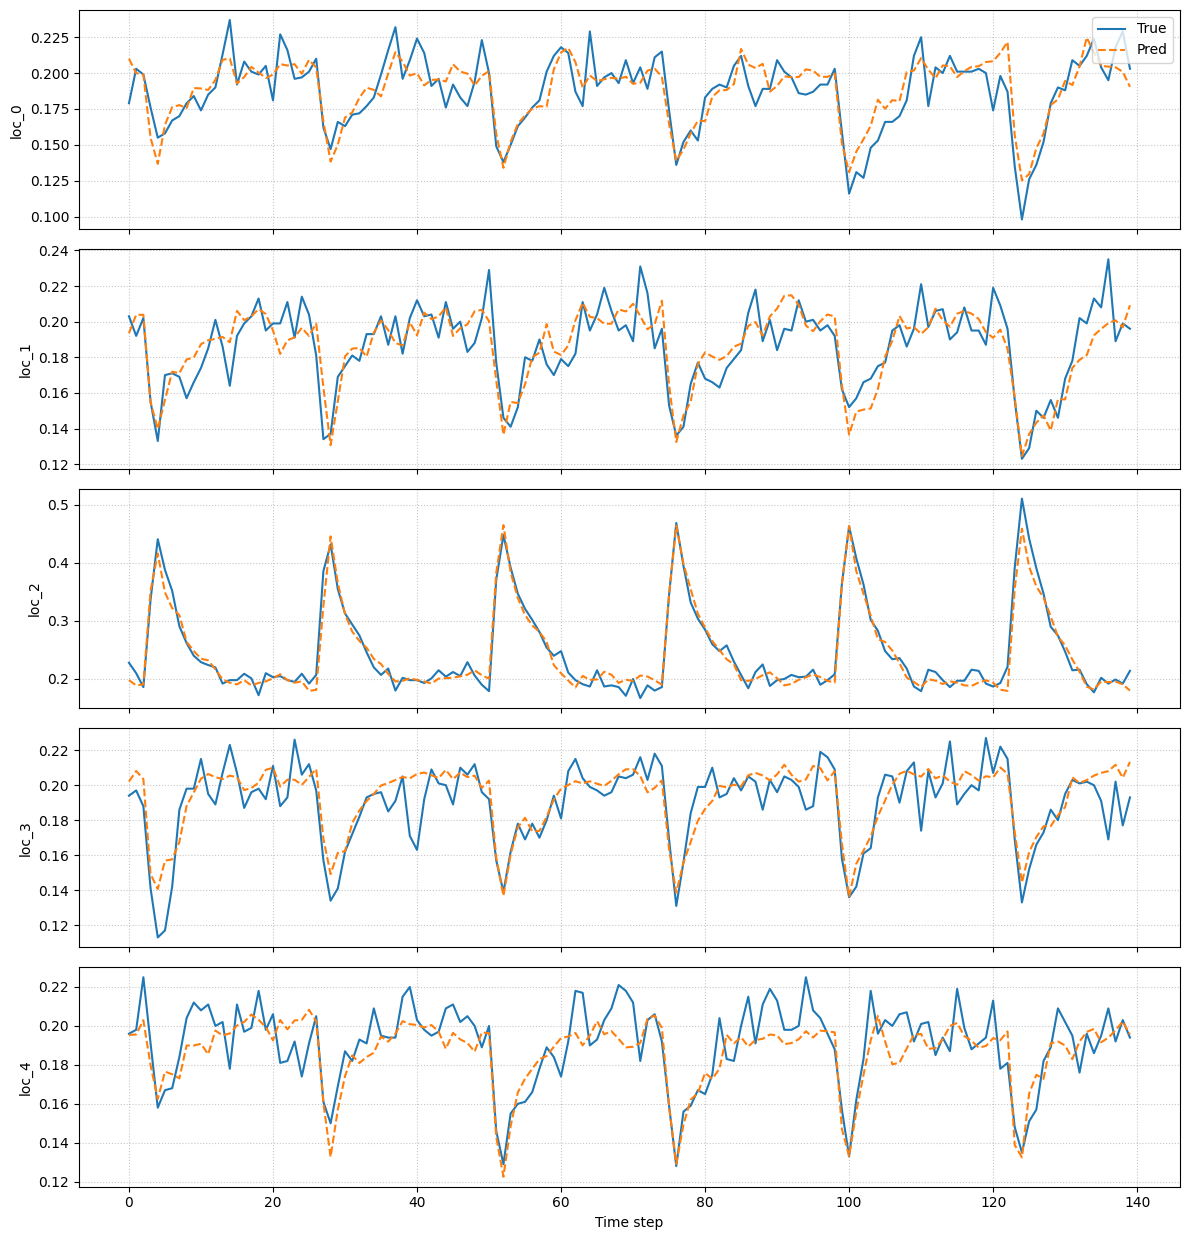

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# assume you already have:
# y_test: shape (N, 5)
# y_pred: shape (N, 5)

n_features = y_test.shape[1]
timesteps = np.arange(len(y_test))

fig, axes = plt.subplots(n_features, 1, figsize=(12, 2.5 * n_features), sharex=True)

for i in range(n_features):
    ax = axes[i]
    ax.plot(timesteps, y_test[:, i], label='True', linewidth=1.5)
    ax.plot(timesteps, y_pred[:, i], label='Pred', linestyle='--', linewidth=1.5)
    ax.set_ylabel(f'loc_{i}')
    ax.grid(True, linestyle=':', alpha=0.7)
    if i == 0:
        ax.legend(loc='upper right')
    if i == n_features - 1:
        ax.set_xlabel('Time step')

plt.tight_layout()
plt.show()


## 3.3.2 PyTorch implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# --- Configurable hyperparameters controlling model complexity ---
d_model = 64          # embedding dimension
num_heads = 4         # number of attention heads
num_layers = 4        # number of transformer encoder layers
ff_dim = 128          # feed-forward hidden dimension
dropout = 0.1         # dropout rate
batch_size = 32
epochs = 50
lr = 1e-3

# --- Prepare data ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train_scaled, dtype=torch.float32)
X_val = torch.tensor(X_test_scaled, dtype=torch.float32)
y_val = torch.tensor(y_test_scaled, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)


In [ ]:
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, d_model, n_heads, n_layers, ff_dim, dropout=0.1):
        super().__init__()

        # Project input features (e.g. 5 → 64)
        self.input_proj = nn.Linear(input_dim, d_model)

        # Positional encoding
        self.pos_encoding = self._generate_pos_encoding(500, d_model)

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            batch_first=True,
            activation='gelu'
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)

        # Regression head
        self.head = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, 64),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(64, input_dim)
        )

    def _generate_pos_encoding(self, max_len, d_model):
        """Precompute sinusoidal positional encodings"""
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        return pe

    def forward(self, x):
        seq_len = x.size(1)
        x = self.input_proj(x) + self.pos_encoding[:, :seq_len, :].to(x.device)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling over sequence
        return self.head(x)


In [ ]:
model = TimeSeriesTransformer(
    input_dim=X_train.shape[2],
    d_model=d_model,
    n_heads=num_heads,
    n_layers=num_layers,
    ff_dim=ff_dim,
    dropout=dropout
).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

def r2_score(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * Xb.size(0)

    model.eval()
    val_loss, val_r2 = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb).squeeze()
            val_loss += criterion(preds, yb).item() * Xb.size(0)
            val_r2 += r2_score(yb, preds).item() * Xb.size(0)

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    val_r2 /= len(val_loader.dataset)

    print(f"Epoch {epoch+1:02d} | Train loss: {train_loss:.4f} | "
          f"Val loss: {val_loss:.4f} | Val R2: {val_r2:.4f}")


Epoch 01 | Train loss: 1.0092 | Val loss: 0.9934 | Val R2: 0.0393
Epoch 02 | Train loss: 0.6715 | Val loss: 0.4651 | Val R2: 0.5310
Epoch 03 | Train loss: 0.4322 | Val loss: 0.5256 | Val R2: 0.4801
Epoch 04 | Train loss: 0.3872 | Val loss: 0.3640 | Val R2: 0.6257
Epoch 05 | Train loss: 0.3552 | Val loss: 0.3732 | Val R2: 0.6141
Epoch 06 | Train loss: 0.3501 | Val loss: 0.3804 | Val R2: 0.6130
Epoch 07 | Train loss: 0.3491 | Val loss: 0.3875 | Val R2: 0.6050
Epoch 08 | Train loss: 0.3428 | Val loss: 0.3699 | Val R2: 0.6106
Epoch 09 | Train loss: 0.3309 | Val loss: 0.3637 | Val R2: 0.6203
Epoch 10 | Train loss: 0.3278 | Val loss: 0.3917 | Val R2: 0.6037
Epoch 11 | Train loss: 0.3094 | Val loss: 0.3490 | Val R2: 0.6355
Epoch 12 | Train loss: 0.3023 | Val loss: 0.3630 | Val R2: 0.6273
Epoch 13 | Train loss: 0.3167 | Val loss: 0.3367 | Val R2: 0.6471
Epoch 14 | Train loss: 0.3048 | Val loss: 0.3484 | Val R2: 0.6447
Epoch 15 | Train loss: 0.2734 | Val loss: 0.3193 | Val R2: 0.6646
Epoch 16 |

In [ ]:
import torch
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# --- tryb ewaluacji ---
model.eval()

# --- zbieramy predykcje ---
y_true_list = []
y_pred_list = []

with torch.no_grad():
    for Xb, yb in val_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        y_true_list.append(yb.cpu().numpy())
        y_pred_list.append(preds.cpu().numpy())

# --- składamy w jeden array ---
y_true_scaled = np.vstack(y_true_list)
y_pred_scaled = np.vstack(y_pred_list)

# --- odwrotna transformacja ---
y_true = scaler_y.inverse_transform(y_true_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# --- metryki ---
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.6f}")


R²: 0.6347
MSE: 0.000295


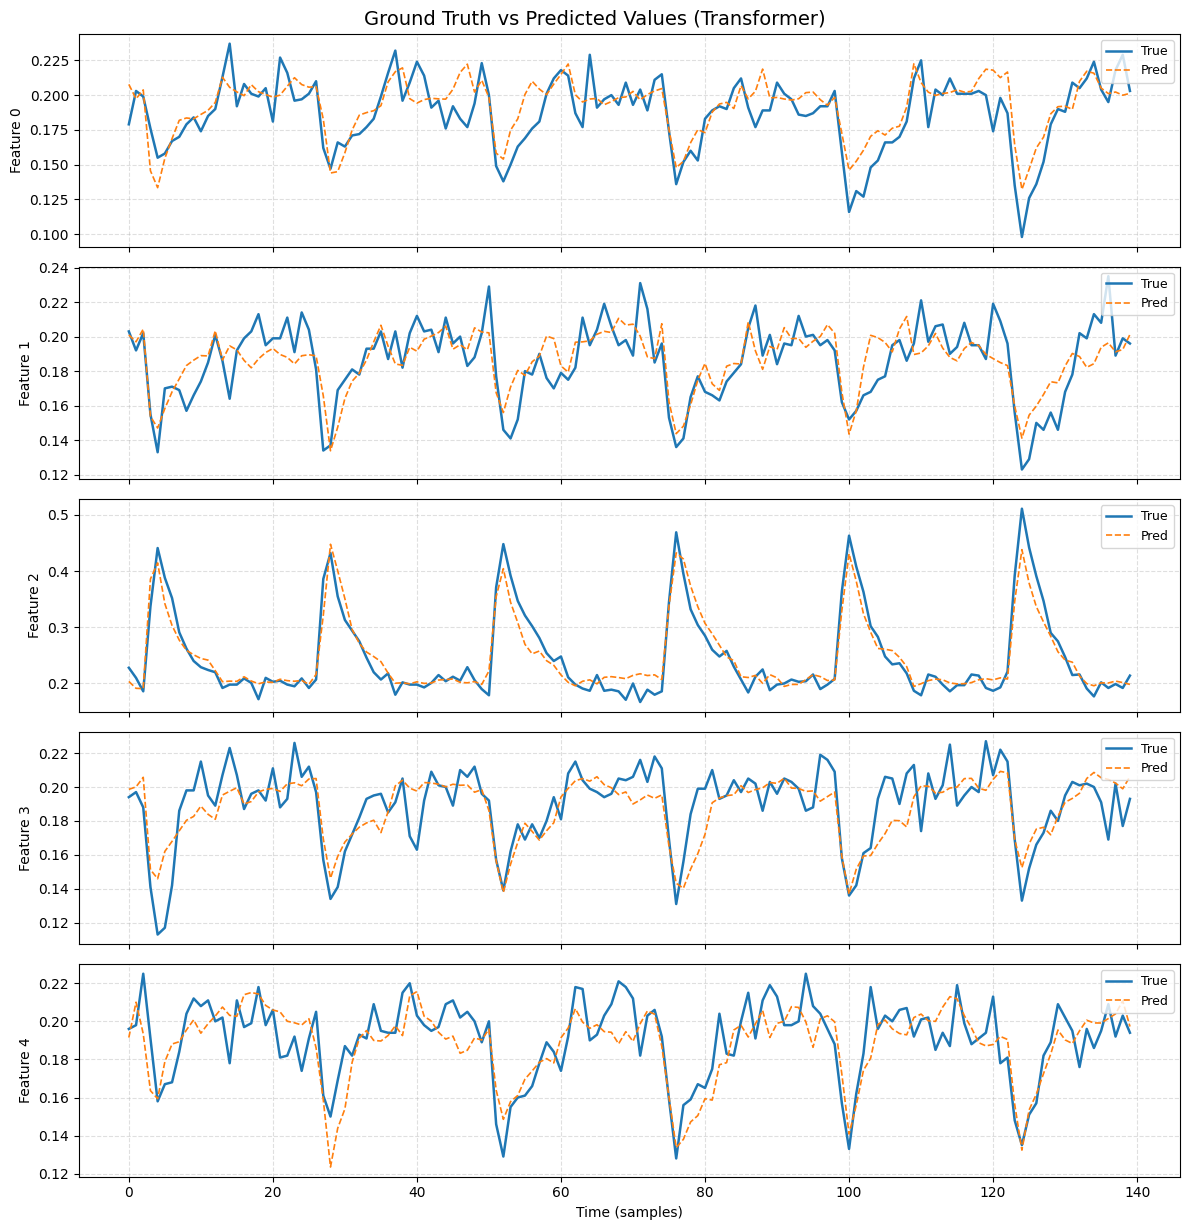

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_true and y_pred are numpy arrays of shape (n_samples, 5)
n_features = y_true.shape[1]
time = np.arange(len(y_true))  # x-axis index (could be timestamps if you have them)

fig, axes = plt.subplots(n_features, 1, figsize=(12, 2.5 * n_features), sharex=True)

for i in range(n_features):
    ax = axes[i]
    ax.plot(time, y_true[:, i], label="True", lw=1.8)
    ax.plot(time, y_pred[:, i], label="Pred", lw=1.2, linestyle='--')
    ax.set_ylabel(f"Feature {i}")
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc="upper right", fontsize=9)

axes[-1].set_xlabel("Time (samples)")
fig.suptitle("Ground Truth vs Predicted Values (Transformer)", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()


## 3.3.3 **TODO**

Test 6-8 configurations for various:
* window sizes
* embedding dimensions
* numbers of attention heads
* numbers of transformers layers
* feed-forward network size (dimensfionality of the internal dense layer inside each Transformer block)

Give summary results in a table. Include parameters and  regression scores. Add selected plots (e.g. for the best and worst results).



# Tasks

Write a short report containg the following items. Use plots and tables. Make comments. Deliver as a PDF file.


* Section 3.1.3 Perform sentiment classification using IMDB dataset (35%)
  * Prepare 8 configurations (including various preprocessing parameters).
  * Report results in the table summarizing parameter values and classification results (report accuracy, precision, recall, F1).
  * Display a few reviews from the dataset and print classification result
  * Use Tensorflow or Pytorch library

* Section 3.2.4 Follow the specification (35%)

* Section 3.3.3 Follow the specification (20%)

* Answer the questions (10%)
  1. What is the complexity of attention mechanism with respect to $n$ - the sequence lengths

  2. Is the attention map global or local (pertaining to the sequence).

  3. Which parameters are learned during training the Transformers models for NLP?

  4. What is the role of positional encoding?

  5. Which output data resulting from Transformer Block can be used for classification or regression